<a href="https://colab.research.google.com/github/yaswanthkumargothi/Portfolio/blob/master/cnr_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OUTLINE  

1.   Missing value imputation

2.   Wind Velocity and Direction calculation

3.   Models for each windfarm




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import os
from datetime import datetime


In [ ]:
#!pip install ipympl
#%matplotlib widget

In [ ]:
path = '/content/drive/My Drive/cnr/WindFarms_complementary_data.csv'
complementary=pd.read_csv(path,encoding = "ISO-8859-1",delimiter=';')

In [ ]:
complementary.head()

,Time (UTC),Wind Farm,Wind Turbine,Average power output (MW),Cumulated energy produced (MWh),Wind direction (°),Wind speed (m/s),Nacelle direction (°),Rotational speed (s-1)
0,01/05/2018 01:00,WF1,TE1,0.05,0.05,167.75,2.73,158.34,6.66
1,01/05/2018 01:00,WF1,TE2,0.00,0.00,142.94,3.48,124.73,2.72
2,01/05/2018 01:00,WF1,TE3,0.02,0.02,115.26,3.62,169.45,8.74
3,01/05/2018 01:00,WF1,TE4,0.00,0.00,119.77,3.35,194.33,0.96
4,01/05/2018 02:00,WF1,TE1,0.05,0.05,163.58,2.03,110.05,3.94


In [ ]:
complementary.shape

(187106, 9)

In [ ]:
path = '/content/drive/My Drive/cnr/Y_train_sl9m6Jh.csv'
y_train=pd.read_csv(path,encoding = "ISO-8859-1",delimiter=',')

In [ ]:
path = '/content/drive/My Drive/cnr/X_train_v2.csv'
X_train=pd.read_csv(path,encoding = "ISO-8859-1",delimiter=',')

In [ ]:
pd.set_option('display.max_rows', 1000)
X_train.isna().sum()

In [ ]:
path='/content/drive/My Drive/cnr/X_test_v2.csv'
X_test=pd.read_csv(path,encoding = "ISO-8859-1",delimiter=',')
path= '/content/drive/My Drive/cnr/Y_test_random.csv'
y_test=pd.read_csv(path,encoding = "ISO-8859-1",delimiter=',')


In [ ]:
pd.set_option('display.max_rows', 1000)
X_test.head();

In [ ]:
X_train['Time']=pd.to_datetime(X_train['Time'],format='%d/%m/%Y %H:%M')
X_test['Time']=pd.to_datetime(X_test['Time'],format='%d/%m/%Y %H:%M')

train_aug=X_test[X_test['Time']< pd.Timestamp(2019,5,2)]

train_1yr=pd.concat([X_train,train_aug],axis=0)

In [ ]:
test_aug=X_test[(X_test['Time']>= pd.Timestamp(2019,5,1)) & (X_test['Time']< pd.Timestamp(2019,5,2))]

id_test=test_aug['ID']
y_aug=y_test[y_test['ID'].isin(id_test)]

In [ ]:
y_aug.shape

(144, 2)

In [ ]:
train_1yr.isna().sum();

In [ ]:
#function to extract data for particular wind farm and weather forecasting model 
def wind_farm_weather(wf_num,X_train,weather):
  wind_farm=X_train[X_train["WF"]==wf_num]
  a=wind_farm.iloc[:,:3]
  if weather == 'nwp1d1':
    b=wind_farm.iloc[:,15:27]
    wf_nwpd= pd.concat([a, b.reindex(a.index)], axis=1)
  elif weather == 'nwp1d2':
    b=wind_farm.iloc[:,:15]
    wf_nwpd= pd.concat([a, b.reindex(a.index)], axis=1)
  elif weather == 'nwp1d':
    b=wind_farm.iloc[:,27:39]
    wf_nwpd= pd.concat([a, b.reindex(a.index)], axis=1)
  elif weather == 'nwp2d2':
    b=wind_farm.iloc[:,39:43]
    wf_nwpd= pd.concat([a, b.reindex(a.index)], axis=1)
  elif weather == 'nwp2d1':
    b=wind_farm.iloc[:,43:47]
    wf_nwpd= pd.concat([a, b.reindex(a.index)], axis=1)
  elif weather == 'nwp2d':
    b=wind_farm.iloc[:,47:51]
    wf_nwpd= pd.concat([a, b.reindex(a.index)], axis=1)
  elif weather == 'nwp3d2':
    b=wind_farm.iloc[:,51:63]
    wf_nwpd= pd.concat([a, b.reindex(a.index)], axis=1)
  elif weather == 'nwp3d1':
    b=wind_farm.iloc[:,63:75]
    wf_nwpd= pd.concat([a, b.reindex(a.index)], axis=1)
  elif weather == 'nwp3d':
    b=wind_farm.iloc[:,75:87]
    wf_nwpd= pd.concat([a, b.reindex(a.index)], axis=1)
  elif weather == 'nwp4d2':
    b=wind_farm.iloc[:,87:93]
    wf_nwpd= pd.concat([a, b.reindex(a.index)], axis=1)
  elif weather == 'nwp4d1':
    b=wind_farm.iloc[:,93:99]
    wf_nwpd= pd.concat([a, b.reindex(a.index)], axis=1)
  elif weather == 'nwp4d':
    b=wind_farm.iloc[:,99:105]
    wf_nwpd= pd.concat([a, b.reindex(a.index)], axis=1)
  
    
  return wf_nwpd

In [ ]:
wf1_nwp1d1=wind_farm_weather('WF1',train_1yr,'nwp1d1')
wf2_nwp1d1=wind_farm_weather('WF2',train_1yr,'nwp1d1')
wf3_nwp1d1=wind_farm_weather('WF3',train_1yr,'nwp1d1')
wf4_nwp1d1=wind_farm_weather('WF4',train_1yr,'nwp1d1')
wf5_nwp1d1=wind_farm_weather('WF5',train_1yr,'nwp1d1')
wf6_nwp1d1=wind_farm_weather('WF6',train_1yr,'nwp1d1')


In [ ]:
wf1_nwp1d1_test=wind_farm_weather('WF1',test_aug,'nwp1d1')
wf2_nwp1d1_test=wind_farm_weather('WF2',test_aug,'nwp1d1')
wf3_nwp1d1_test=wind_farm_weather('WF3',test_aug,'nwp1d1')
wf4_nwp1d1_test=wind_farm_weather('WF4',test_aug,'nwp1d1')
wf5_nwp1d1_test=wind_farm_weather('WF5',test_aug,'nwp1d1')
wf6_nwp1d1_test=wind_farm_weather('WF6',test_aug,'nwp1d1')


In [ ]:
#wf1_nwp1d1_test.reset_index(inplace=True)
wf1_nwp1d1.head()

,ID,WF,Time,NWP1_00h_D-1_U,NWP1_00h_D-1_V,NWP1_00h_D-1_T,NWP1_06h_D-1_U,NWP1_06h_D-1_V,NWP1_06h_D-1_T,NWP1_12h_D-1_U,NWP1_12h_D-1_V,NWP1_12h_D-1_T,NWP1_18h_D-1_U,NWP1_18h_D-1_V,NWP1_18h_D-1_T
0,1,WF1,2018-05-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,WF1,2018-05-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,WF1,2018-05-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,WF1,2018-05-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,WF1,2018-05-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#rows with all columns null values
print(wf1_nwp1d1.iloc[:,3:].isna().all(axis=1).sum())
print(wf2_nwp1d1.iloc[:,3:].isna().all(axis=1).sum())
print(wf3_nwp1d1.iloc[:,3:].isna().all(axis=1).sum())
print(wf4_nwp1d1.iloc[:,3:].isna().all(axis=1).sum())
print(wf5_nwp1d1.iloc[:,3:].isna().all(axis=1).sum())
print(wf6_nwp1d1.iloc[:,3:].isna().all(axis=1).sum())

23
23
23
23
23
23


In [ ]:
#imputation
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

def impute_missing(wf_nwpd,wf_nwpd_test):
  wf_nwpd_trunc=wf_nwpd.iloc[23:,:]
  wf_nwpd_trunc.reset_index(inplace=True)
  wf_nwpd_trunc=wf_nwpd_trunc.drop('index',axis=1)
  
  wf_nwpd_test.reset_index(inplace=True)
  wf_nwpd_test.drop('index',axis=1,inplace=True)

  imputer = IterativeImputer(max_iter=20)
  imputer.fit(wf_nwpd_trunc.iloc[:,3:])
  wf_nwpd_imputed=imputer.transform(wf_nwpd_trunc.iloc[:,3:])
  wf_nwpd_imputed_test=imputer.transform(wf_nwpd_test.iloc[:,3:])

  wf_nwpd_imputed_df=pd.DataFrame(wf_nwpd_imputed,columns=wf_nwpd.iloc[:,3:].columns)
  wf_nwpd_imputed_testdf=pd.DataFrame(wf_nwpd_imputed_test,columns=wf_nwpd_test.iloc[:,3:].columns)
  return wf_nwpd_trunc,wf_nwpd_imputed_testdf,wf_nwpd_imputed_df

In [ ]:
wf1_nwp1d1_trunc,wf1_nwp1d1_imputed_testdf,wf1_nwp1d1_imputed_df=impute_missing(wf1_nwp1d1,wf1_nwp1d1_test)
wf2_nwp1d1_trunc,wf2_nwp1d1_imputed_testdf,wf2_nwp1d1_imputed_df=impute_missing(wf2_nwp1d1,wf2_nwp1d1_test)
wf3_nwp1d1_trunc,wf3_nwp1d1_imputed_testdf,wf3_nwp1d1_imputed_df=impute_missing(wf3_nwp1d1,wf3_nwp1d1_test)
wf4_nwp1d1_trunc,wf4_nwp1d1_imputed_testdf,wf4_nwp1d1_imputed_df=impute_missing(wf4_nwp1d1,wf4_nwp1d1_test)
wf5_nwp1d1_trunc,wf5_nwp1d1_imputed_testdf,wf5_nwp1d1_imputed_df=impute_missing(wf5_nwp1d1,wf5_nwp1d1_test)
wf6_nwp1d1_trunc,wf6_nwp1d1_imputed_testdf,wf6_nwp1d1_imputed_df=impute_missing(wf6_nwp1d1,wf6_nwp1d1_test)


In [ ]:
#new variables
def new_features(wf1_nwpd1_imputed_df):
  speed_list=[]
  complete_dir =[]
  for i in range(len(wf1_nwpd1_imputed_df.columns)):
    if i%3==0:
      individual_dir=[]
      speed=np.linalg.norm(wf1_nwpd1_imputed_df.iloc[:,i:i+2],axis=1)
      speed_list.append(speed)
      df=wf1_nwpd1_imputed_df.iloc[:,i:i+2]
      for i,row in df.iterrows():
        x=row[0]
        y=row[1]
        #direction calculations
        if x>0:
          dir=np.arctan(y/x)
        elif y>0 and x<0:
          dir=np.arctan(y/x)+np.pi
        elif y<0 and x<0:
          dir= np.arctan(y/x)-np.pi
        elif y>0 and x==0:
          dir = np.pi/2
        elif y<0 and x==0:
          dir = -np.pi/2
        elif y==0 and x==0:
          dir = 0
        individual_dir.append(dir)
      complete_dir.append(individual_dir)
  return speed_list, complete_dir     

In [ ]:
def df_extrafeatures(wf_nwpd_trunc,wf_nwpd_imputed_df):
  speed_ls,complete_dir=new_features(wf_nwpd_imputed_df)
  #speed
  speeddf=pd.DataFrame(speed_ls)
  speeddf=speeddf.T
  speeddf.columns=['NWP1_00h_D-1_speed','NWP1_06h_D-1_speed','NWP1_12h_D-1_speed','NWP1_18h_D-1_speed']
  #direction
  directiondf=pd.DataFrame(complete_dir)
  directiondf=directiondf.T
  directiondf.columns=['NWP1_00h_D-1_dir','NWP1_06h_D-1_dir','NWP1_12h_D-1_dir','NWP1_18h_D-1_dir']
  #merging all the dataframes
  wf_nwpd_features=pd.concat([wf_nwpd_trunc.iloc[:,:3],wf_nwpd_imputed_df,speeddf,directiondf],axis=1)
  return wf_nwpd_features

In [ ]:
wf1_nwp1d1_features=df_extrafeatures(wf1_nwp1d1_trunc,wf1_nwp1d1_imputed_df)
wf2_nwp1d1_features=df_extrafeatures(wf2_nwp1d1_trunc,wf2_nwp1d1_imputed_df)
wf3_nwp1d1_features=df_extrafeatures(wf3_nwp1d1_trunc,wf3_nwp1d1_imputed_df)
wf4_nwp1d1_features=df_extrafeatures(wf4_nwp1d1_trunc,wf4_nwp1d1_imputed_df)
wf5_nwp1d1_features=df_extrafeatures(wf5_nwp1d1_trunc,wf5_nwp1d1_imputed_df)
wf6_nwp1d1_features=df_extrafeatures(wf6_nwp1d1_trunc,wf6_nwp1d1_imputed_df)

In [ ]:
wf1_nwp1d1_features_test=df_extrafeatures(wf1_nwp1d1_test,wf1_nwp1d1_imputed_testdf)
wf2_nwp1d1_features_test=df_extrafeatures(wf2_nwp1d1_test,wf2_nwp1d1_imputed_testdf)
wf3_nwp1d1_features_test=df_extrafeatures(wf3_nwp1d1_test,wf3_nwp1d1_imputed_testdf)
wf4_nwp1d1_features_test=df_extrafeatures(wf4_nwp1d1_test,wf4_nwp1d1_imputed_testdf)
wf5_nwp1d1_features_test=df_extrafeatures(wf5_nwp1d1_test,wf5_nwp1d1_imputed_testdf)
wf6_nwp1d1_features_test=df_extrafeatures(wf6_nwp1d1_test,wf6_nwp1d1_imputed_testdf)

In [ ]:
id_test=train_aug['ID']
y_aug=y_test[y_test['ID'].isin(id_test)]
y_1yr=pd.concat([y_train,y_aug])
#y_test.iloc[:32858,:]


In [ ]:
print(y_1yr.shape,train_1yr.shape)

(52459, 2) (52459, 105)


In [ ]:
#merging Y_train with X_train
y_1yr['ID']=y_1yr['ID'].astype('float')
#wf1_nwpd1_features['ID']=wf1_nwpd1_features['ID'].astype('int')
wf1_train=wf1_nwp1d1_features.merge(y_1yr,on='ID',how='left')
wf2_train=wf2_nwp1d1_features.merge(y_1yr,on='ID',how='left')
wf3_train=wf3_nwp1d1_features.merge(y_1yr,on='ID',how='left')
wf4_train=wf4_nwp1d1_features.merge(y_1yr,on='ID',how='left')
wf5_train=wf5_nwp1d1_features.merge(y_1yr,on='ID',how='left')
wf6_train=wf6_nwp1d1_features.merge(y_1yr,on='ID',how='left')

In [ ]:
wf1_train=wf1_train.set_index('Time')
wf2_train=wf2_train.set_index('Time')
wf3_train=wf3_train.set_index('Time')
wf4_train=wf4_train.set_index('Time')
wf5_train=wf5_train.set_index('Time')
wf6_train=wf6_train.set_index('Time')

In [ ]:
wf1_nwp1d1_features_test=wf1_nwp1d1_features_test.set_index('Time')
wf2_nwp1d1_features_test=wf2_nwp1d1_features_test.set_index('Time')
wf3_nwp1d1_features_test=wf3_nwp1d1_features_test.set_index('Time')
wf4_nwp1d1_features_test=wf4_nwp1d1_features_test.set_index('Time')
wf5_nwp1d1_features_test=wf5_nwp1d1_features_test.set_index('Time')
wf6_nwp1d1_features_test=wf6_nwp1d1_features_test.set_index('Time')

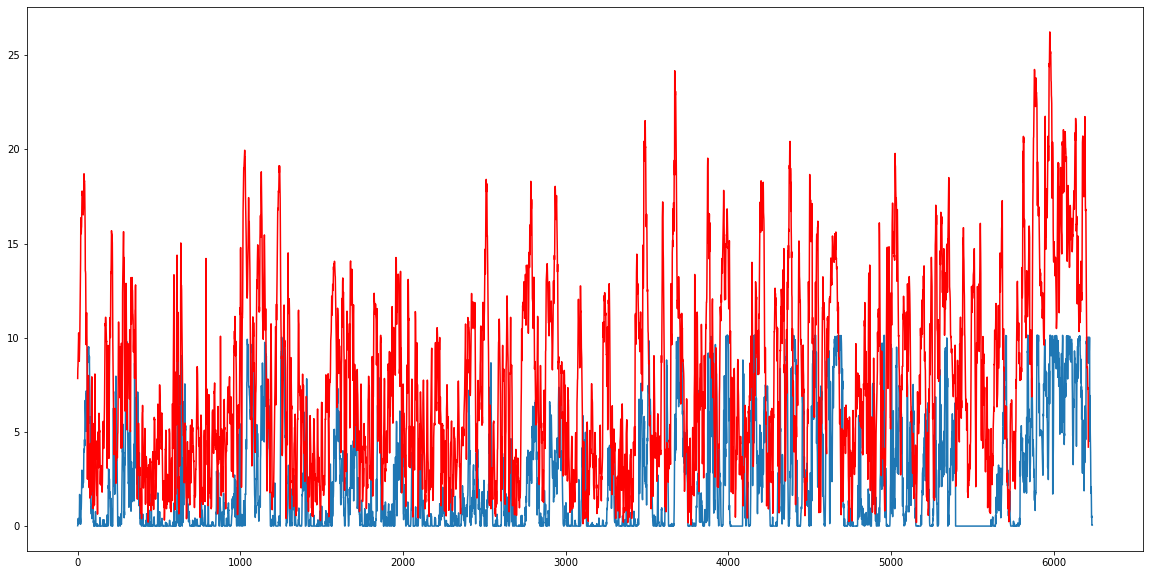

In [ ]:
%matplotlib inline
#fig.canvas.toolbar_visible = True
#fig.canvas.header_visible = True
#fig.canvas.resizable = True
##EDA
plt.subplots(figsize=(20,10))
y_train.iloc[:6239,1].plot(kind='line')
wf1_nwpd1_features['NWP1_00h_D-1_speed'].plot(color='r')
plt.show()

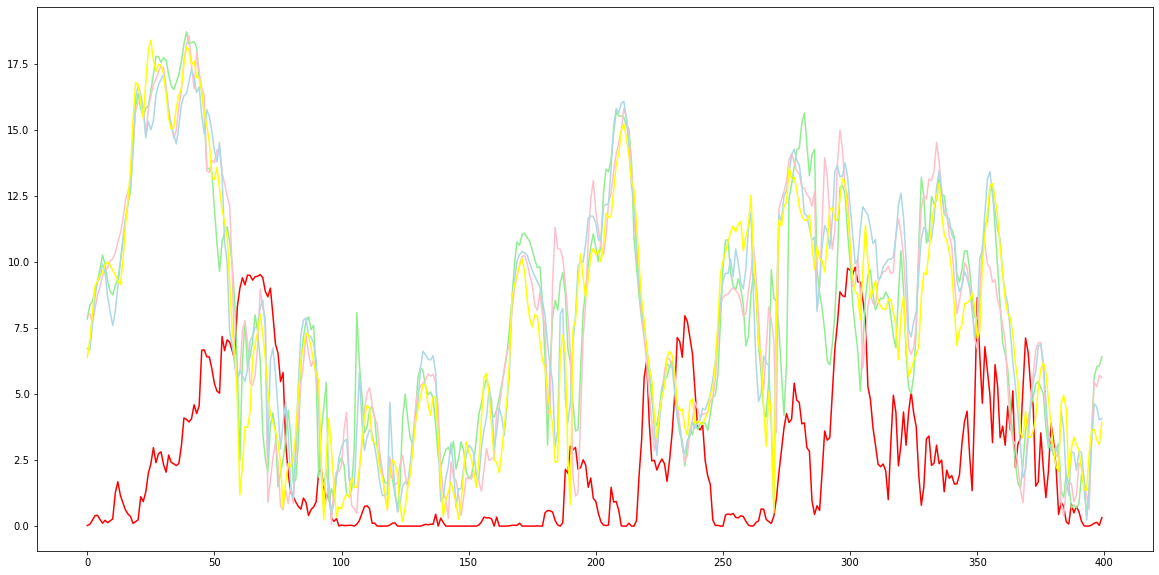

In [ ]:
#speed and loadoutput
plt.subplots(figsize=(20,10))

y_train.iloc[:400,1].plot(kind='line',color='r')
wf1_nwpd1_features['NWP1_00h_D-1_speed'][0:400].plot(color='lightgreen')
wf1_nwpd1_features['NWP1_06h_D-1_speed'][0:400].plot(color='pink')
wf1_nwpd1_features['NWP1_12h_D-1_speed'][0:400].plot(color='lightblue')
wf1_nwpd1_features['NWP1_18h_D-1_speed'][0:400].plot(color='yellow')


plt.show()

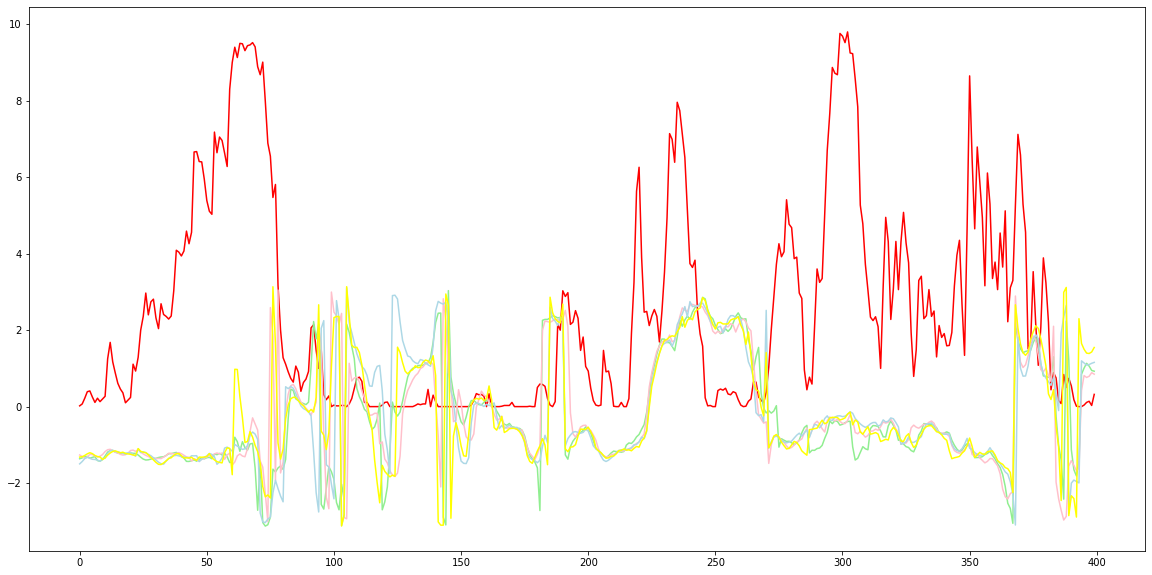

In [ ]:
# dierction and load output
plt.subplots(figsize=(20,10))

y_train.iloc[:400,1].plot(kind='line',color='r')
wf1_nwpd1_features['NWP1_00h_D-1_dir'][0:400].plot(color='lightgreen')
wf1_nwpd1_features['NWP1_06h_D-1_dir'][0:400].plot(color='pink')
wf1_nwpd1_features['NWP1_12h_D-1_dir'][0:400].plot(color='lightblue')
wf1_nwpd1_features['NWP1_18h_D-1_dir'][0:400].plot(color='yellow')

plt.show()

Negative radians refers to the wind direction is in 3 and 4th quadrants.

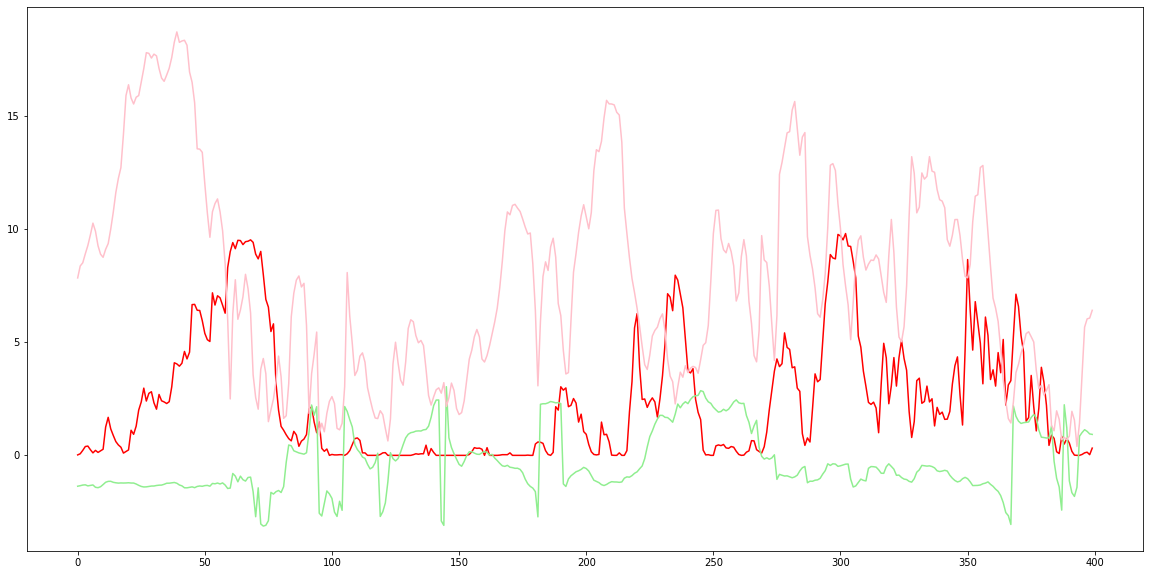

In [ ]:
#direction, speed and load output
plt.subplots(figsize=(20,10))

y_train.iloc[:400,1].plot(kind='line',color='r')
wf1_nwpd1_features['NWP1_00h_D-1_dir'][0:400].plot(color='lightgreen')
wf1_nwpd1_features['NWP1_00h_D-1_speed'][0:400].plot(color='pink')

plt.show()

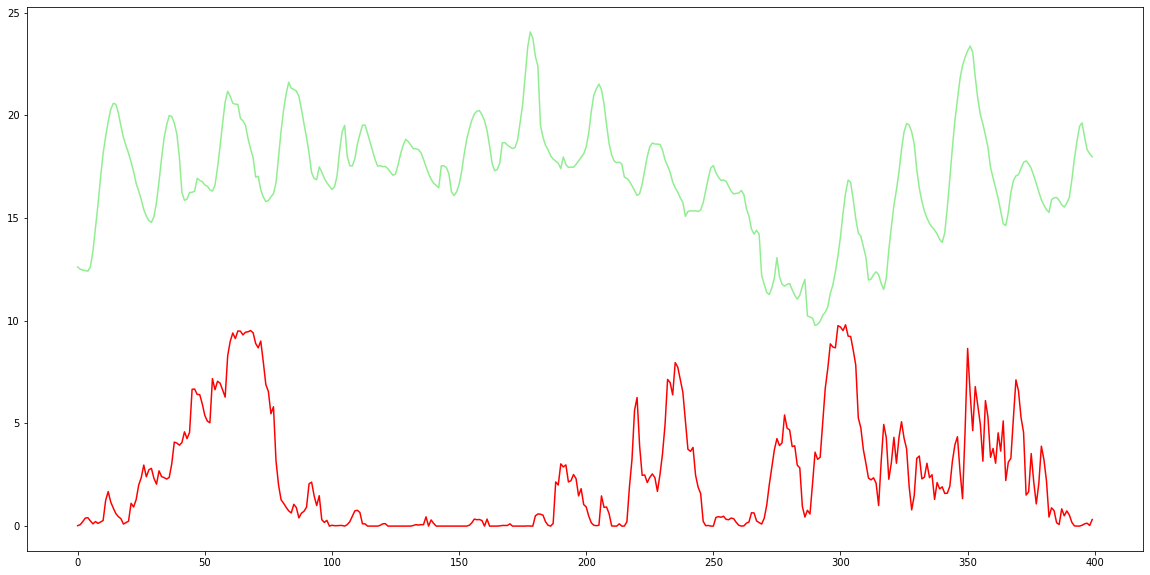

In [ ]:
#temperature, loadoutput
temp_c=wf1_nwpd1_features['NWP1_00h_D-1_T'][0:400]-273

plt.subplots(figsize=(20,10))

y_train.iloc[:400,1].plot(kind='line',color='r')
temp_c.plot(color='lightgreen')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal  import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#wf1_train['Time'].tail()

6210    15/01/2019 20:00
6211    15/01/2019 21:00
6212    15/01/2019 22:00
6213    15/01/2019 23:00
6214    16/01/2019 00:00
Name: Time, dtype: object

In [ ]:
#Time indexing
#wf1_train['Time']=pd.to_datetime(wf1_train['Time'],format='%d/%m/%Y %H:%M')
#wf1_train=wf1_train.set_index('Time')

In [ ]:
#wf1_train['Time'].tail()

6210   2019-01-15 20:00:00
6211   2019-01-15 21:00:00
6212   2019-01-15 22:00:00
6213   2019-01-15 23:00:00
6214   2019-01-16 00:00:00
Name: Time, dtype: datetime64[ns]

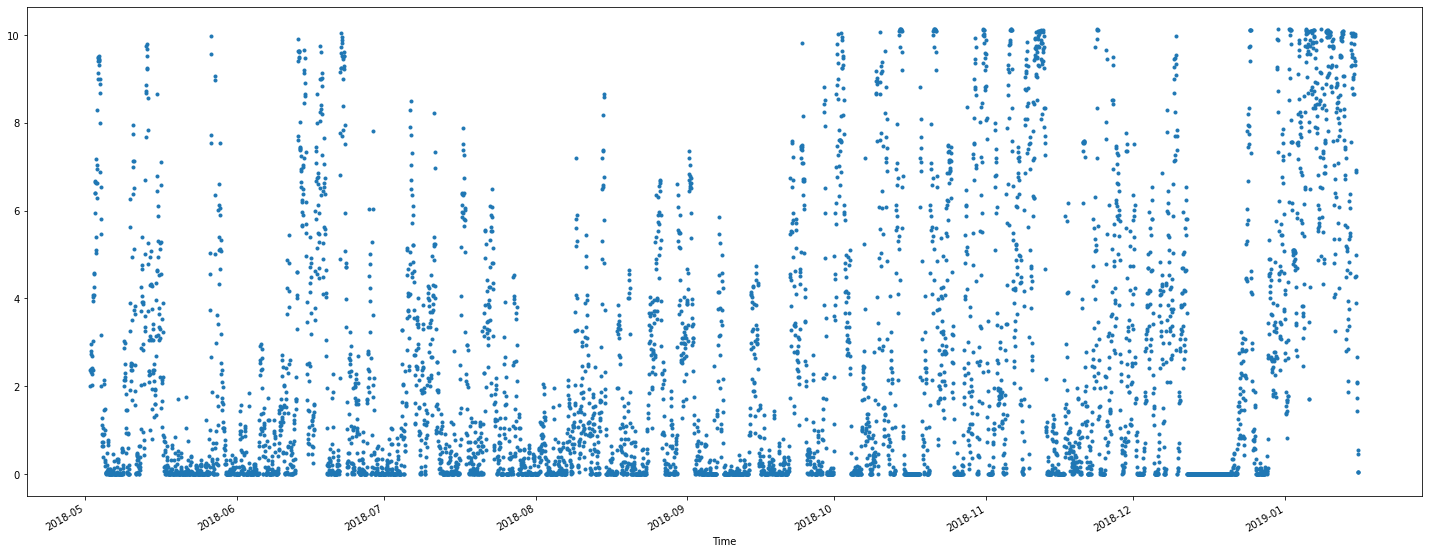

In [ ]:
fig,ax=plt.subplots(figsize=(25,10))
wf1_train['Production'].plot(style='.',ax=ax)

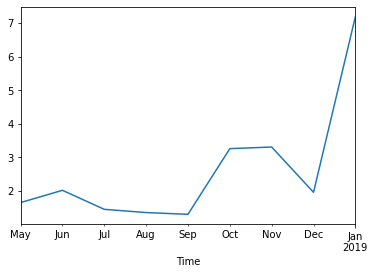

In [ ]:
wf1_train['Production'].resample('M').mean().plot()

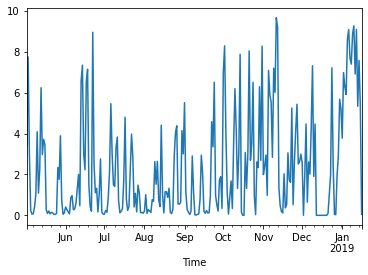

In [ ]:
wf1_train['Production'].resample('D').mean().plot()

In [ ]:
result=seasonal_decompose(wf1_train['Production'],freq=30)


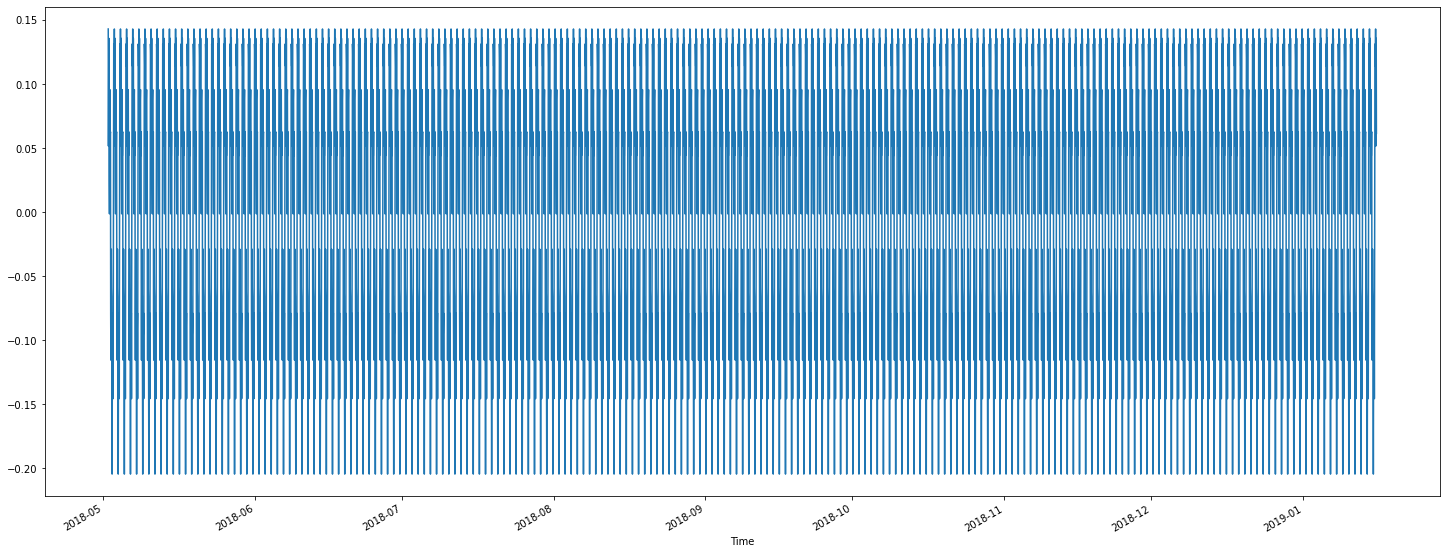

In [ ]:
plt.subplots(figsize=(25,10))
result.seasonal.plot()

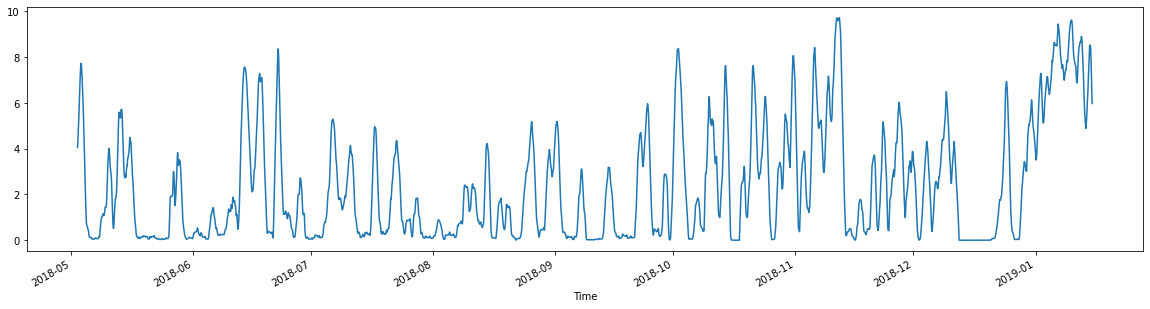

In [ ]:
plt.subplots(figsize=(20,5))
result.trend.plot()

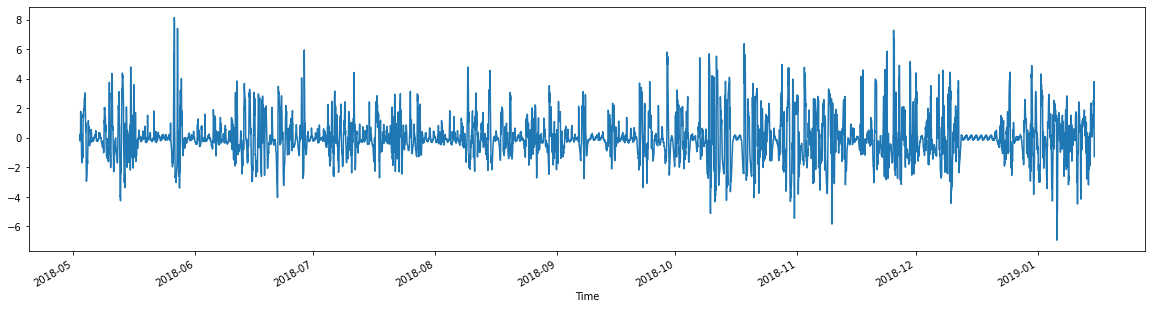

In [ ]:
plt.subplots(figsize=(20,5))
result.resid.plot()

Additive seasonality with no trend

In [ ]:
#creating dataframe with speed, direction, Temperature
def time_model(time,wf_train):
  if time=='00h':
    var = ['NWP1_00h_D-1_speed','NWP1_00h_D-1_dir','NWP1_00h_D-1_T','Production']
    wf_train_h=wf_train.loc[:,var]
  elif time == '06h':
    var = ['NWP1_06h_D-1_speed','NWP1_06h_D-1_dir','NWP1_06h_D-1_T','Production']
    wf_train_h=wf_train.loc[:,var]
  elif time == '12h':
    var = ['NWP1_12h_D-1_speed','NWP1_12h_D-1_dir','NWP1_12h_D-1_T','Production']
    wf_train_h=wf_train.loc[:,var]
  elif time =='18h':
    var = ['NWP1_18h_D-1_speed','NWP1_18h_D-1_dir','NWP1_18h_D-1_T','Production']
    wf_train_h=wf_train.loc[:,var]
  return wf_train_h


In [ ]:
#creating dataframe with speed, direction, Temperature
def time_model_test(time,wf_test):
  if time=='00h':
    var = ['NWP1_00h_D-1_speed','NWP1_00h_D-1_dir','NWP1_00h_D-1_T']
    wf_test_h=wf_test.loc[:,var]
  elif time == '06h':
    var = ['NWP1_06h_D-1_speed','NWP1_06h_D-1_dir','NWP1_06h_D-1_T']
    wf_test_h=wf_test.loc[:,var]
  elif time == '12h':
    var = ['NWP1_12h_D-1_speed','NWP1_12h_D-1_dir','NWP1_12h_D-1_T']
    wf_test_h=wf_test.loc[:,var]
  elif time =='18h':
    var = ['NWP1_18h_D-1_speed','NWP1_18h_D-1_dir','NWP1_18h_D-1_T']
    wf_test_h=wf_test.loc[:,var]
  return wf_test_h


In [ ]:
wf1_train_00h=time_model('00h',wf1_train)
wf2_train_00h=time_model('00h',wf2_train)
wf3_train_00h=time_model('00h',wf3_train)
wf4_train_00h=time_model('00h',wf4_train)
wf5_train_00h=time_model('00h',wf5_train)
wf6_train_00h=time_model('00h',wf6_train)


In [ ]:
wf1_test_00h=time_model_test('00h',wf1_nwp1d1_features_test)
wf2_test_00h=time_model_test('00h',wf2_nwp1d1_features_test)
wf3_test_00h=time_model_test('00h',wf3_nwp1d1_features_test)
wf4_test_00h=time_model_test('00h',wf4_nwp1d1_features_test)
wf5_test_00h=time_model_test('00h',wf5_nwp1d1_features_test)
wf6_test_00h=time_model_test('00h',wf6_nwp1d1_features_test)


In [ ]:
import math
#direction conversion from radians to  degrees
def radians_degrees(wf_train_h):
  wf_train_h['NWP1_00h_D-1_dir']=wf_train_h['NWP1_00h_D-1_dir'].apply(math.degrees)
  wf_train_h['NWP1_00h_D-1_dir'] = wf_train_h['NWP1_00h_D-1_dir'].apply(lambda x: x+360  if x <  0 else x) 
  return wf_train_h

In [ ]:
wf1_train_00h=radians_degrees(wf1_train_00h)
wf2_train_00h=radians_degrees(wf2_train_00h)
wf3_train_00h=radians_degrees(wf3_train_00h)
wf4_train_00h=radians_degrees(wf4_train_00h)
wf5_train_00h=radians_degrees(wf5_train_00h)
wf6_train_00h=radians_degrees(wf6_train_00h)


In [ ]:
wf1_test_00h=radians_degrees(wf1_test_00h)
wf2_test_00h=radians_degrees(wf2_test_00h)
wf3_test_00h=radians_degrees(wf3_test_00h)
wf4_test_00h=radians_degrees(wf4_test_00h)
wf5_test_00h=radians_degrees(wf5_test_00h)
wf6_test_00h=radians_degrees(wf6_test_00h)


In [ ]:
wf6_test_00h.isna().sum()

NWP1_00h_D-1_speed    0
NWP1_00h_D-1_dir      0
NWP1_00h_D-1_T        0
dtype: int64

In [ ]:
#stationarity
print(coint_johansen(wf1_train_00h,-1,1).eig)
print(coint_johansen(wf2_train_00h,-1,1).eig)
print(coint_johansen(wf3_train_00h,-1,1).eig)
print(coint_johansen(wf4_train_00h,-1,1).eig)
print(coint_johansen(wf5_train_00h,-1,1).eig)
print(coint_johansen(wf6_train_00h,-1,1).eig)


[9.61575473e-02 8.09643844e-02 2.12792691e-02 4.65265676e-06]
[1.18548733e-01 6.79196559e-02 3.41414685e-02 1.79224007e-05]
[1.11156434e-01 6.28868229e-02 2.90469835e-02 1.51838063e-05]
[1.10193684e-01 6.93426560e-02 2.51447125e-02 1.57852169e-05]
[9.38829744e-02 7.67065008e-02 2.36478789e-02 1.57091132e-05]
[1.13720999e-01 3.27524746e-02 2.48721965e-02 2.25650261e-05]


All eigen values less than 1. So, the variables are stationary

In [ ]:
#VAR model
def model_ts(wf_train_h):
  model = VAR(endog=wf_train_h)

  model_fit = model.fit()

  # make prediction on validation
  prediction = model_fit.forecast(model_fit.y, steps=24)

  return prediction

In [ ]:
#prediction[:,3]
wf1_prediction_00h = model_ts(wf1_train_00h)
wf2_prediction_00h = model_ts(wf2_train_00h)
wf3_prediction_00h = model_ts(wf3_train_00h)
wf4_prediction_00h = model_ts(wf4_train_00h)
wf5_prediction_00h = model_ts(wf5_train_00h)
wf6_prediction_00h = model_ts(wf6_train_00h)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local

In [ ]:
wf_all_preds=np.concatenate([wf1_prediction_00h[:,3],wf2_prediction_00h[:,3],wf3_prediction_00h[:,3],wf4_prediction_00h[:,3],wf5_prediction_00h[:,3],wf6_prediction_00h[:,3]])

In [ ]:
def CAPE_CNR_function(dataframe_y_true, dataframe_y_pred):
    # CAPE function
    cape_cnr = 100*np.sum(np.abs(dataframe_y_pred-dataframe_y_true))/np.sum(dataframe_y_true)
    return cape_cnr


In [ ]:
Y_test_nextday=y_aug.iloc[:,1]

In [ ]:
cape=CAPE_CNR_function(Y_test_nextday, wf_all_preds)
cape

62.63577768922156

In [ ]:
test_aug.reset_index(inplace=True)
y_truess=pd.DataFrame(y_aug,columns=['y_trues'])
y_truess.reset_index(inplace=True)
y_true=pd.concat([test_aug['Time'],test_aug['WF'],y_aug['Production']],axis=1)


In [ ]:
y_aug.reset_index(inplace=True)

In [ ]:
all_preds=pd.DataFrame(wf_all_preds,columns=['y_preds'])
all_preds.reset_index(inplace=True)
all_preds=all_preds.drop('index',axis=1)

y_preds=pd.concat([test_aug['Time'],test_aug['WF'],all_preds],axis=1)

In [ ]:
y_true=y_true.set_index(y_true['Time'])
y_preds=y_preds.set_index(y_preds['Time'])

In [ ]:
y_aug.reset_index(inplace=True)

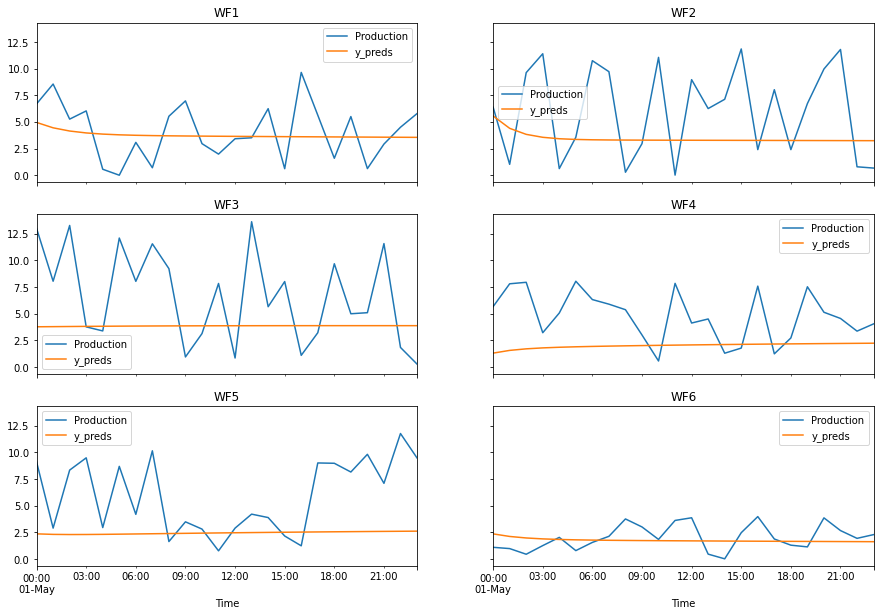

In [ ]:
wf_ls =['WF1','WF2','WF3','WF4','WF5','WF6']
i=1
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(15,10))
axes_list = [item for sublist in axes for item in sublist] 
for wf in wf_ls:
  ax = axes_list.pop(0)
  y_true_wf1=y_true[y_true['WF']==wf]
  ax1=y_true_wf1.plot('Time','Production',ax=ax)
  y_preds_wf1=y_preds[y_preds['WF']==wf]
  y_preds_wf1.plot('Time','y_preds',ax=ax1)
  ax.set_title(wf)
plt.show()
#y_true

#FB Prophet

In [ ]:
from fbprophet import Prophet

In [ ]:
def prophet_convert(wf_train_h):
  wf_train_h['ds']=wf_train_h.index
  wf_train_h['y']=wf_train_h['Production']
  return wf_train_h

In [ ]:
wf1_train_00h= prophet_convert(wf1_train_00h)
wf2_train_00h= prophet_convert(wf2_train_00h)
wf3_train_00h= prophet_convert(wf3_train_00h)
wf4_train_00h= prophet_convert(wf4_train_00h)
wf5_train_00h= prophet_convert(wf5_train_00h)
wf6_train_00h= prophet_convert(wf6_train_00h)

In [ ]:
wf1_test_00h['ds']= wf1_test_00h.index
wf2_test_00h['ds']= wf2_test_00h.index
wf3_test_00h['ds']= wf3_test_00h.index
wf4_test_00h['ds']= wf4_test_00h.index
wf5_test_00h['ds']= wf5_test_00h.index
wf6_test_00h['ds']= wf6_test_00h.index

In [ ]:
import itertools

In [ ]:
def mape(df,forecast):
      ape = np.abs((df['y'] - forecast['yhat']) / df['y'])
      return ape

In [ ]:
def prophet_model(df):
  param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
  }

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  rmses = []  # Store the RMSEs for each params here
  for params in all_params:
    m = Prophet(**params)
    m.add_regressor('NWP1_00h_D-1_speed')
    m.add_regressor('NWP1_00h_D-1_dir')
    m.add_regressor('NWP1_00h_D-1_T')
    m.fit(df[df['ds']<pd.Timestamp(2019,5,1)])
    future = m.make_future_dataframe(periods=24,freq='H')
    future['NWP1_00h_D-1_speed']=df['NWP1_00h_D-1_speed'].values
    future['NWP1_00h_D-1_dir']=df['NWP1_00h_D-1_dir'].values
    future['NWP1_00h_D-1_T']=df['NWP1_00h_D-1_T'].values
    forecast = m.predict(future)
    
    out=df[df['ds']>pd.Timestamp(2019,5,1)]
    ape=mape(out,forecast)
    if ape<newape:
      wf_forecast = forecast
      newparams = params      
    newape=ape
  #fig2 = m.plot_components(forecast)
  return wf_forecast,params

In [ ]:
wf1_forecast,params = prophet_model(wf1_train_00h)
wf2_forecast,params = prophet_model(wf2_train_00h)
wf3_forecast,params = prophet_model(wf3_train_00h)
wf4_forecast,params = prophet_model(wf4_train_00h)
wf5_forecast,params = prophet_model(wf5_train_00h)
wf6_forecast,params = prophet_model(wf6_train_00h)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
wf_all_preds_prophet=np.concatenate([wf1_forecast['yhat'].tail(24).values,wf2_forecast['yhat'].tail(24).values,wf3_forecast['yhat'].tail(24).values,wf4_forecast['yhat'].tail(24).values,wf5_forecast['yhat'].tail(24).values,wf6_forecast['yhat'].tail(24).values])

In [ ]:
Y_test_nextday=y_aug.iloc[:,1]

In [ ]:
cape=CAPE_CNR_function(Y_test_nextday, wf_all_preds_prophet)
cape

55.26949296556333

In [ ]:
all_preds_prop=pd.DataFrame(wf_all_preds_prophet,columns=['y_preds'])
all_preds_prop.reset_index(inplace=True)
all_preds_prop=all_preds_prop.drop('index',axis=1)

In [ ]:
y_preds=pd.concat([test_aug['Time'],test_aug['WF'],all_preds_prop],axis=1)
y_preds=y_preds.set_index(y_preds['Time'])

In [ ]:
y_preds

,Time,WF,y_preds
Time,,,
2019-05-01 00:00:00,2019-05-01 00:00:00,WF1,5.647902
2019-05-01 01:00:00,2019-05-01 01:00:00,WF1,5.556103
2019-05-01 02:00:00,2019-05-01 02:00:00,WF1,5.426384
2019-05-01 03:00:00,2019-05-01 03:00:00,WF1,5.208276
2019-05-01 04:00:00,2019-05-01 04:00:00,WF1,5.138026
...,...,...,...
2019-05-01 19:00:00,2019-05-01 19:00:00,WF6,1.623420
2019-05-01 20:00:00,2019-05-01 20:00:00,WF6,1.452780
2019-05-01 21:00:00,2019-05-01 21:00:00,WF6,1.298298


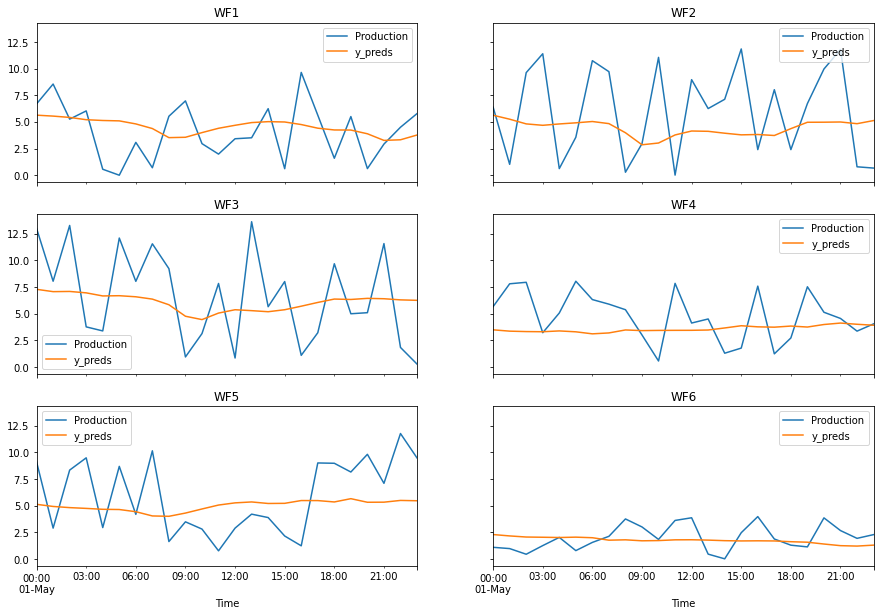

In [ ]:
wf_ls =['WF1','WF2','WF3','WF4','WF5','WF6']
i=1
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(15,10))
axes_list = [item for sublist in axes for item in sublist] 
for wf in wf_ls:
  ax = axes_list.pop(0)
  y_true_wf1=y_true[y_true['WF']==wf]
  ax1=y_true_wf1.plot('Time','Production',ax=ax)
  y_preds_wf1=y_preds[y_preds['WF']==wf]
  y_preds_wf1.plot('Time','y_preds',ax=ax1)
  ax.set_title(wf)
plt.show()
#y_true